In [1]:
file_path = "../mortalidade_2024.csv"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(file_path, sep=';', encoding='latin1')



In [2]:

print(df.head())

# pegar média, mediana, quartis, coisas que tem no slide.

   DATA_ÓBITO NOME_REGIAO       NOME_REGIAO_SAUDE    MUNICIPIO  FAIXA_ETÁRIA  \
0  2023-12-31      CARIRI       18ª REGIÃO IGUATU     ACOPIARA    80 ou mais   
1  2023-12-31      CARIRI       18ª REGIÃO IGUATU      MOMBACA  20 a 29 anos   
2  2023-12-31      CARIRI  19ª REGIÃO BREJO SANTO       AURORA    80 ou mais   
3  2023-12-31      CARIRI  19ª REGIÃO BREJO SANTO  BREJO SANTO    80 ou mais   
4  2023-12-31      CARIRI  19ª REGIÃO BREJO SANTO         JATI    80 ou mais   

       ESCOLARIDADE       SEXO           RACA  \
0          Ignorado   FEMININO         Branca   
1     Fundamental I  MASCULINO  Não Informado   
2     Fundamental I  MASCULINO          Parda   
3  Sem escolaridade  MASCULINO          Parda   
4  Sem escolaridade   FEMININO          Parda   

                                           CID      ACIDENTES  QUANTIDADE  
0   Causas externas de morbidade e mortalidade  Outras causas           1  
1   Causas externas de morbidade e mortalidade  Outras causas           

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60332 entries, 0 to 60331
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DATA_ÓBITO         60332 non-null  object
 1   NOME_REGIAO        60332 non-null  object
 2   NOME_REGIAO_SAUDE  60332 non-null  object
 3   MUNICIPIO          60332 non-null  object
 4   FAIXA_ETÁRIA       60332 non-null  object
 5   ESCOLARIDADE       60332 non-null  object
 6   SEXO               60332 non-null  object
 7   RACA               60332 non-null  object
 8   CID                60332 non-null  object
 9   ACIDENTES          60332 non-null  object
 10  QUANTIDADE         60332 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 5.1+ MB
None


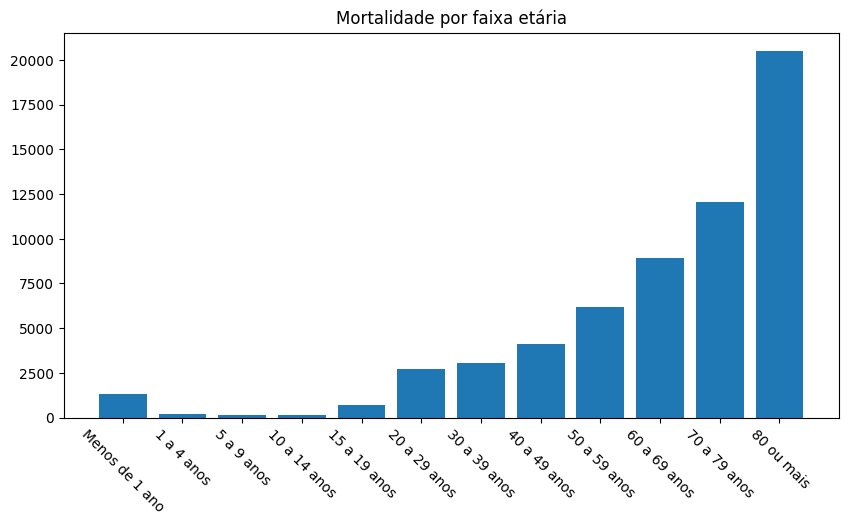

In [6]:
df_custom = df.groupby("FAIXA_ETÁRIA").sum().reset_index()
df_custom = df_custom[["FAIXA_ETÁRIA", "QUANTIDADE"]]

ordem = [
    "Não informado",
    "Menos de 1 ano",
    "1 a 4 anos",
    "5 a 9 anos",
    "10 a 14 anos",
    "15 a 19 anos",
    "20 a 29 anos",
    "30 a 39 anos",
    "40 a 49 anos",
    "50 a 59 anos",
    "60 a 69 anos",
    "70 a 79 anos",
    "80 ou mais",
]
df_custom = df_custom.sort_values(
    by="FAIXA_ETÁRIA", key=lambda x: x.map({faixa: i for i, faixa in enumerate(ordem)})
)
df_custom = df_custom[df_custom["FAIXA_ETÁRIA"] != "Não informado"]

# print(df_custom, "\n")

plt.figure(figsize=(10, 5))
plt.title("Mortalidade por faixa etária")
plt.bar(df_custom["FAIXA_ETÁRIA"], df_custom["QUANTIDADE"])
plt.xticks(rotation=-45)
plt.show()

In [7]:
df_corr = df
df_corr = df_corr.groupby(["FAIXA_ETÁRIA", "SEXO"]).sum().reset_index()
df_corr = df_corr[["FAIXA_ETÁRIA", "SEXO", "QUANTIDADE"]]
print(df_corr.head())

# plt.figure(figsize=(10, 5))
# plt.title("Mortalidade por faixa etária e sexo")
# df_corr = df_corr.sort_values(by="QUANTIDADE", ascending=True)
# plt.barh(df_corr["FAIXA_ETÁRIA"], df_corr["QUANTIDADE"])
# plt.show()

   FAIXA_ETÁRIA       SEXO  QUANTIDADE
0    1 a 4 anos   FEMININO          92
1    1 a 4 anos  MASCULINO         106
2  10 a 14 anos   FEMININO          65
3  10 a 14 anos  MASCULINO         101
4  15 a 19 anos   FEMININO         146


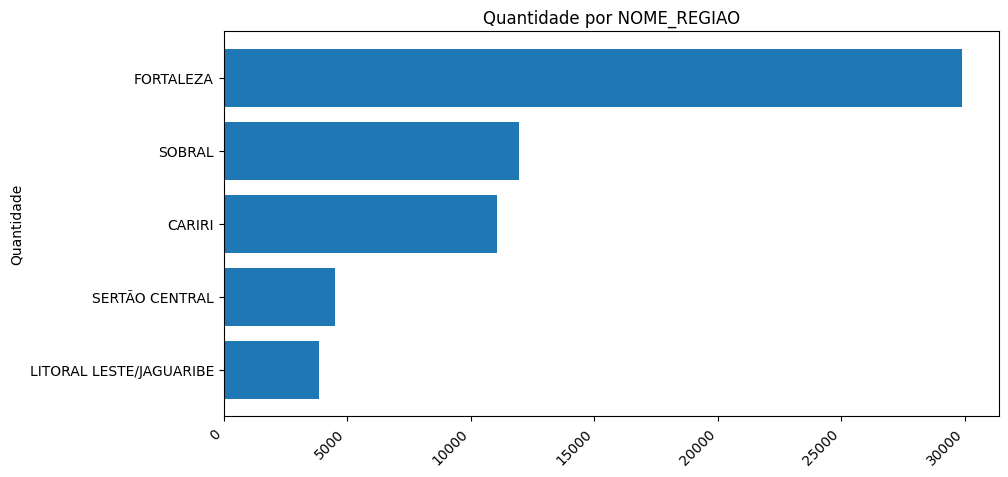

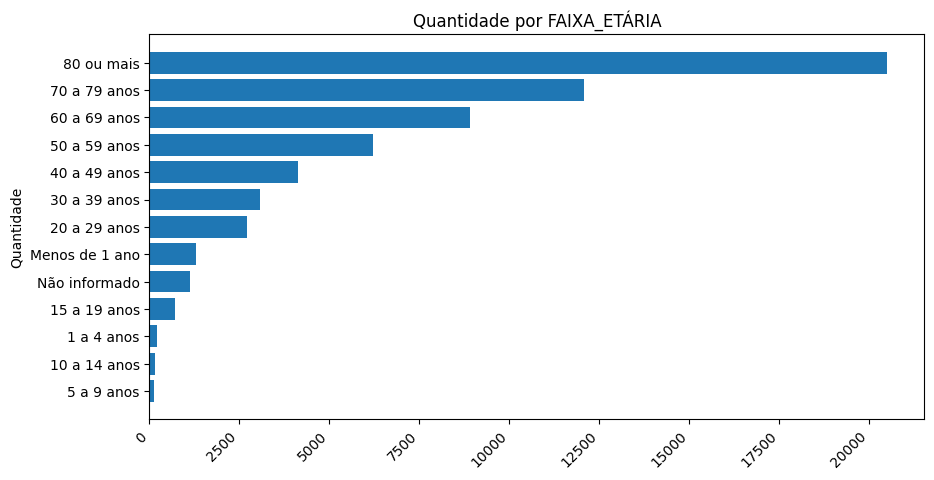

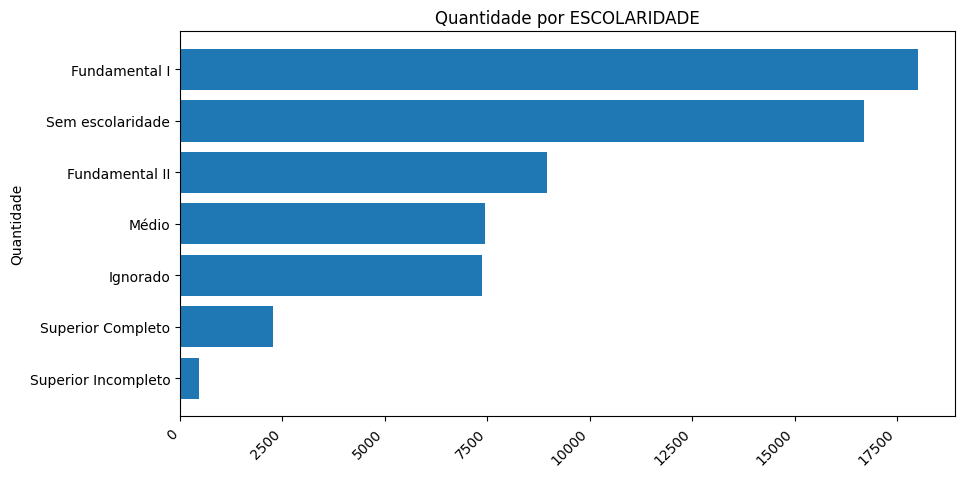

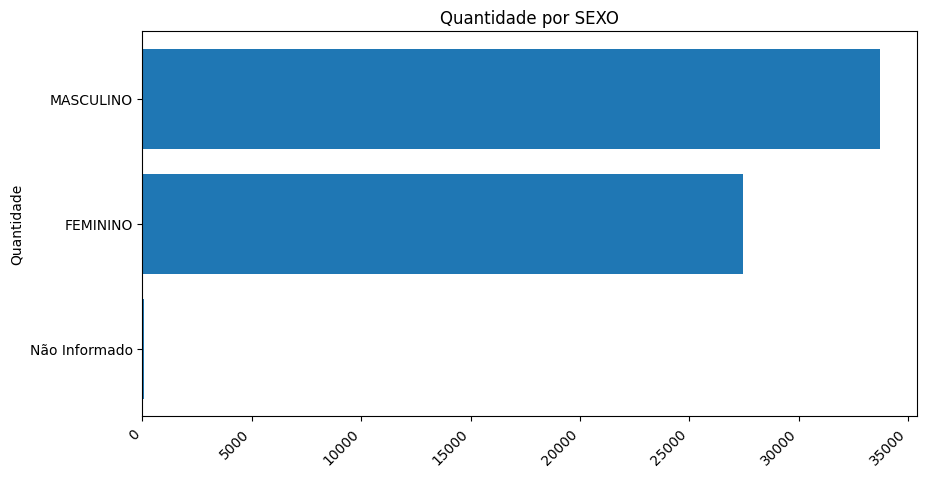

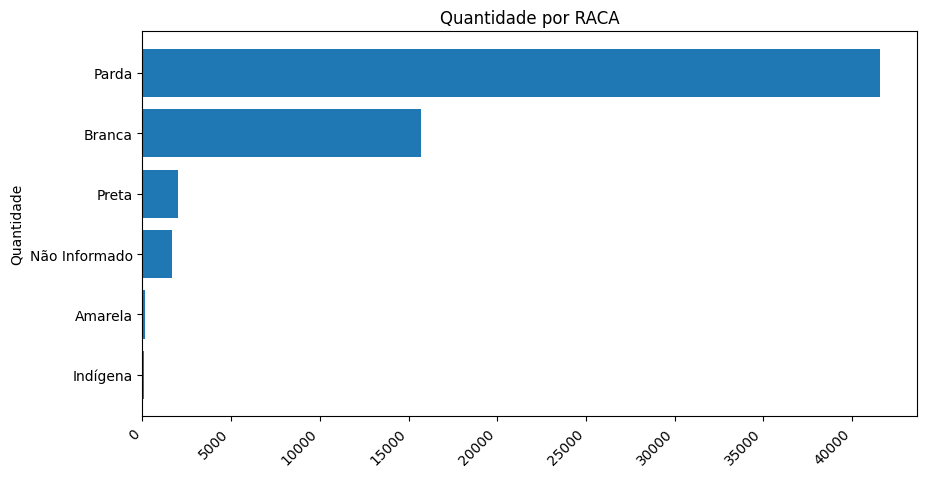

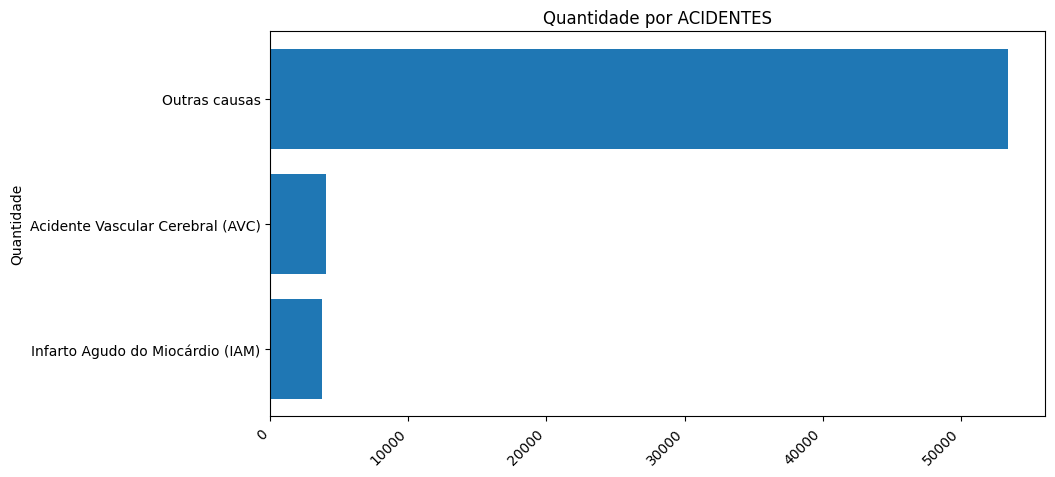

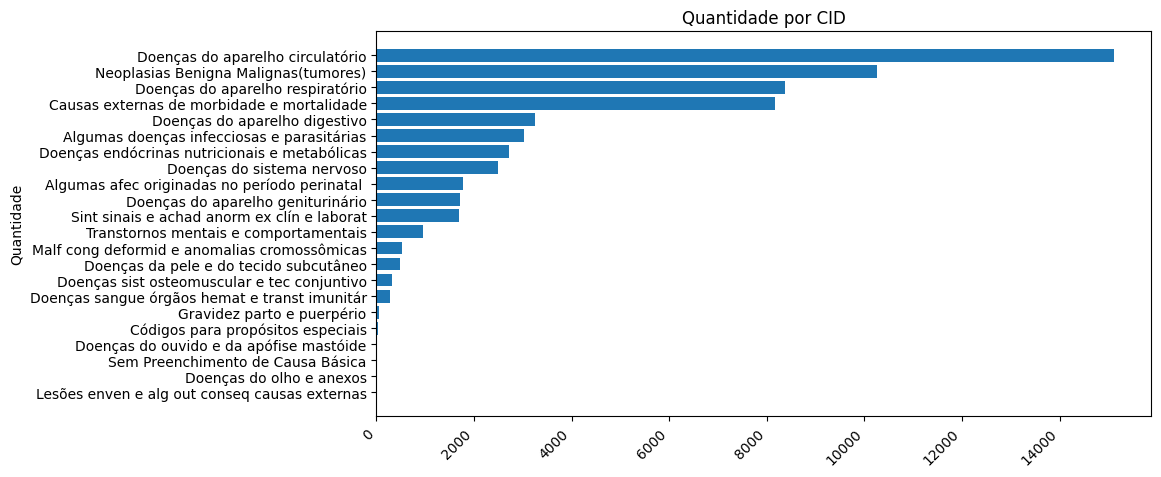

In [13]:
def create_bar_plot(dataframe, groupby_column):
    df_grouped = dataframe.groupby(groupby_column).sum().reset_index()
    df_grouped = df_grouped[[groupby_column, "QUANTIDADE"]]

    df_grouped = df_grouped.sort_values(by="QUANTIDADE", ascending=True)

    plt.figure(figsize=(10, 5))
    plt.barh(df_grouped[groupby_column], df_grouped["QUANTIDADE"])
    plt.title(f"Quantidade por {groupby_column}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Quantidade")
    plt.show()


# Selecionando colunas para plotar
columns_to_plot = [
    "NOME_REGIAO",
    "FAIXA_ETÁRIA",
    "ESCOLARIDADE",
    "SEXO",
    "RACA",
    "ACIDENTES",
    "CID"
]

# Criando os gráficos
for column in columns_to_plot:
    create_bar_plot(df, column)